In [67]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
#Warnings
import warnings
warnings.filterwarnings("ignore")

#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Imported Datasets

In [40]:
tfidf = pd.read_csv("tfidf.csv")
bow = pd.read_csv("bag_of_words.csv")
tfidf, bow = tfidf.set_index("file_name"), bow.set_index("file_name")

In [55]:
tfidf_words = list(tfidf.columns)
bow_words = list(bow.columns)

In [95]:
bow

,children,hernia,report,ctrustees,reporting,kittens,queensland,shevtsov,madania,feasibility,...,activities,horsham,rescue,dalston,tropical,ashford,workshops,others,eastbourne,ryunryr
file_name,,,,,,,,,,,,,,,,,,,,,
23fb53165a108d85b0c09a2ed7d8255e.pdf,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
799d740e93668b7a7ee41268349b3d85.pdf,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
b6583cf1d930e75fa940530e7b122086.pdf,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0a2d99f2d1af478ca00820eca51bc3a1.pdf,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
e734bc7dfc9b37c5dd2c3a37693062e8.pdf,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550235866016dcda5d12e181e8db6736.pdf,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
611ff3eec0e63e5ace5cc9b5476aca30.pdf,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5e48d9ccdfb736186e978102b63bbf62.pdf,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# KMeans Hyperparameters Tuning

In [122]:
#hyperparameter tuning
n_clusters = 5
n_iters = 100
n_seed = 10

pca_num_components = 2

# KMeans TFIDF

In [88]:
kmeans_tfidf = KMeans(n_clusters=n_clusters,
               init="k-means++",
               max_iter=n_iters,
               n_init=1, 
               precompute_distances="auto",
               n_jobs=1)

In [89]:
kmeans_tfidf.fit(tfidf)

KMeans(max_iter=100, n_clusters=5, n_init=1, n_jobs=1,
       precompute_distances='auto')

In [109]:
centroids_tf = kmeans_tfidf.cluster_centers_.argsort()[:,::-1]

In [110]:
for i in range(n_clusters):
    print(f"Cluster {i+1}:")
    for i in centroids_tf[i, :5]:
        print(f"{tfidf_words[i]}")
    print("\n")

Cluster 1:
cx
school
college
august
statements


Cluster 2:
Label
xb
accounts
xa
xe


Cluster 3:
Label
statements
company
total
ended


Cluster 4:
Label
xa
xc
xe
statements


Cluster 5:
Label
church
xe
xa
st




In [105]:
tfidf["Label"] = kmeans_tfidf.fit_predict(tfidf)

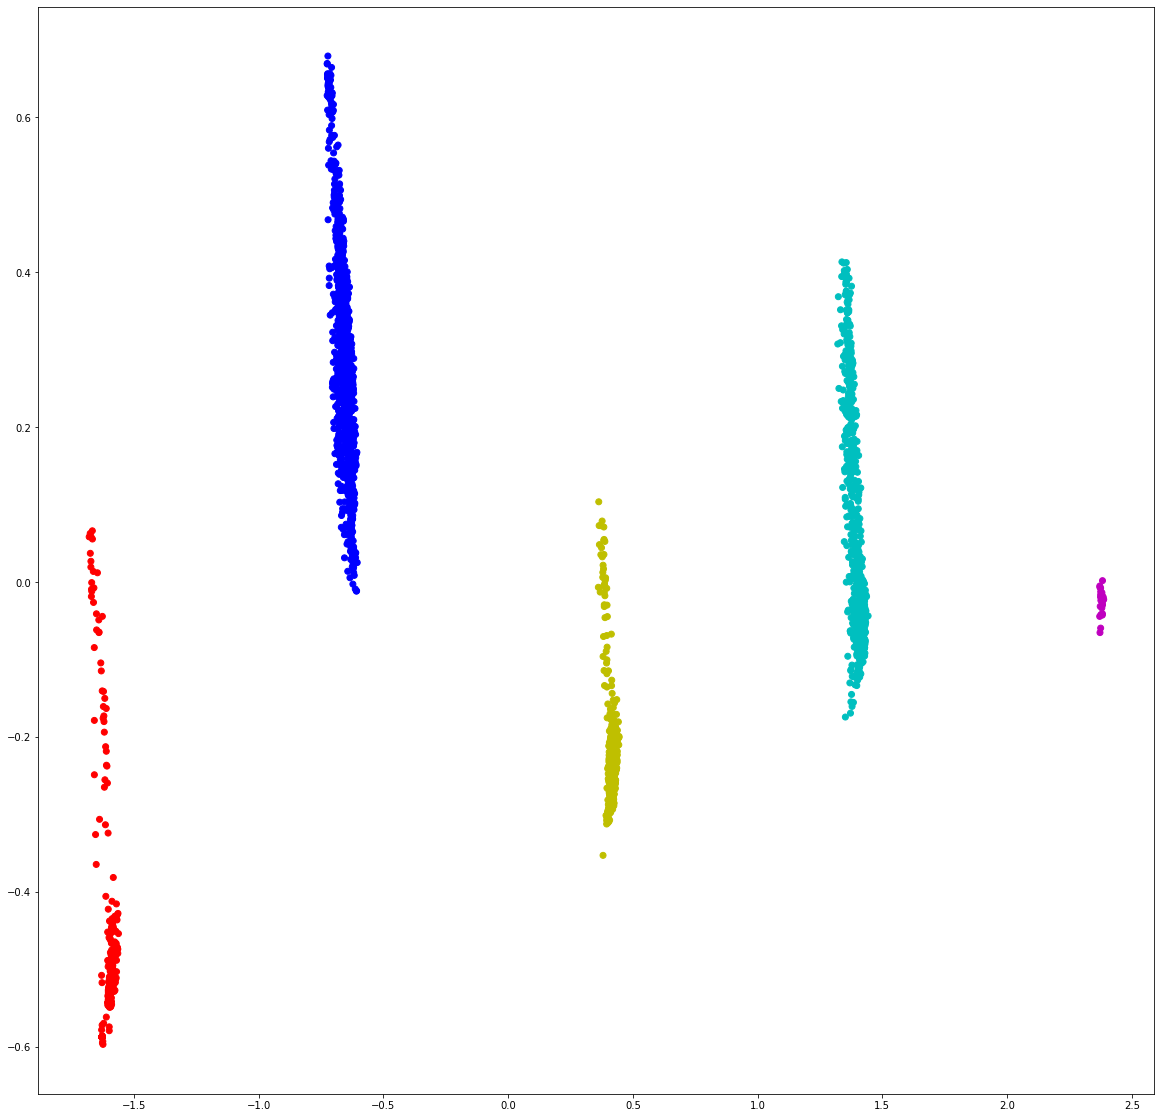

In [111]:
k_mean_indices_tfidf = kmeans_tfidf.fit_transform(tfidf)
scatter_plot_points = PCA(n_components = pca_num_components).fit_transform(tfidf)
colors = ["r","b","y","c","m"]
x_axis = [p[0] for p in scatter_plot_points]
y_axis = [p[1] for p in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x_axis,y_axis, c=[colors[i] for i in tfidf["Label"]])

# KMeans Bag Of Words

In [107]:
kmeans_bow = KMeans(n_clusters=n_clusters,
               init="k-means++",
               max_iter=n_iters,
               n_init=1, 
               precompute_distances="auto",
               n_jobs=1)

In [108]:
kmeans_bow.fit(bow)

KMeans(max_iter=100, n_clusters=5, n_init=1, n_jobs=1,
       precompute_distances='auto')

In [112]:
centroids_bow = kmeans_bow.cluster_centers_.argsort()[:,::-1]

In [114]:
for i in range(n_clusters):
    print(f"Cluster {i+1}:")
    for i in centroids_bow[i, :5]:
        print(f"{bow_words[i]}")
    print("\n")

Cluster 1:
report
charity
trustees
statement
financial


Cluster 2:
united
teaching
academic
scheme
education


Cluster 3:
report
charity
trustees
financial
annual


Cluster 4:
period
within
resources
required
support


Cluster 5:
report
charity
activities
financial
number




In [125]:
bow["Label"] = kmeans_bow.fit_predict(bow)

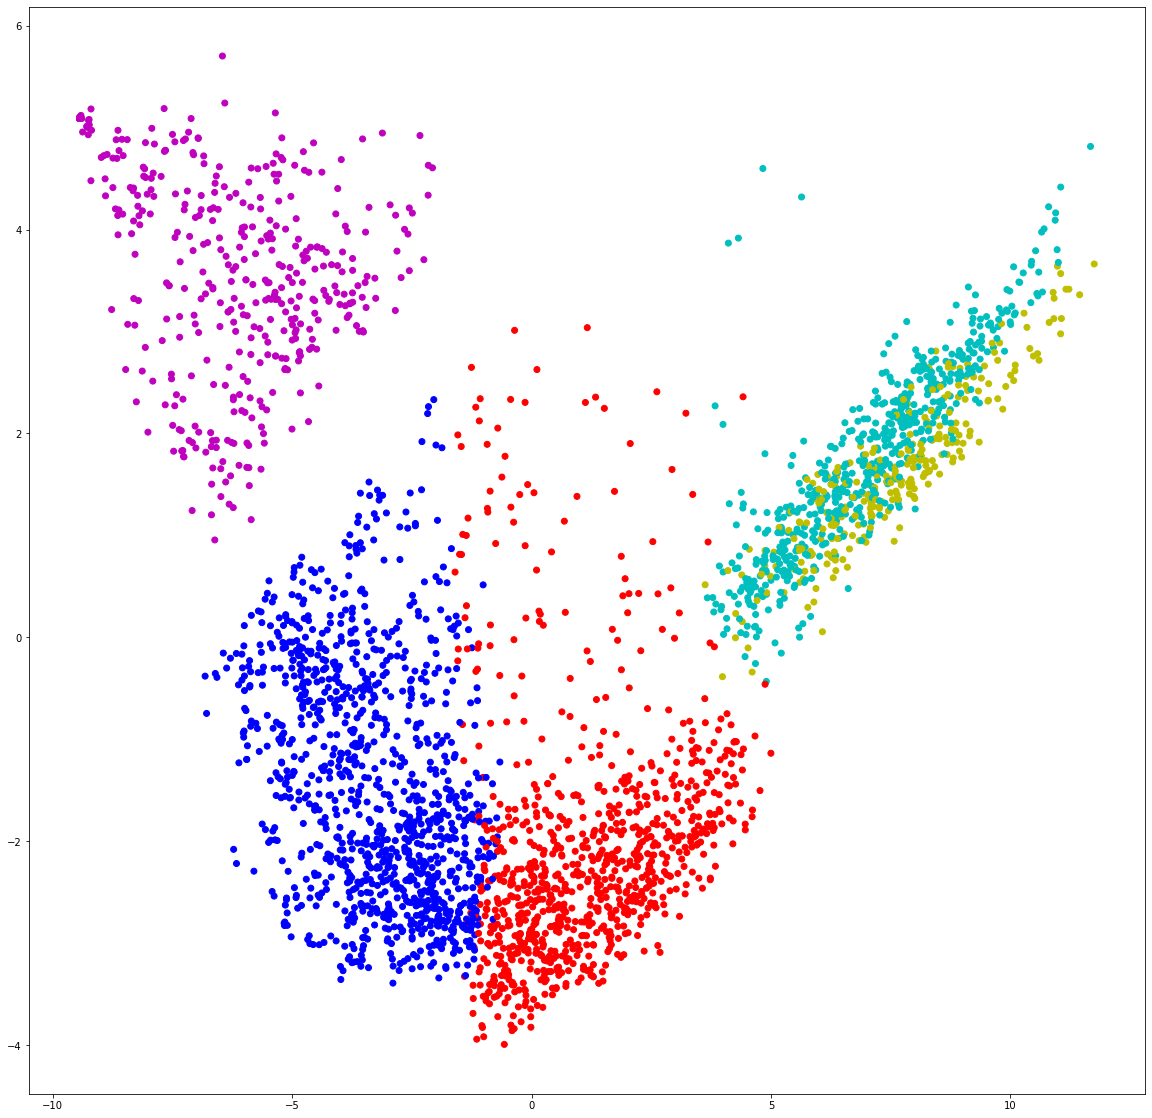

In [128]:
k_mean_indices_bow = kmeans_bow.fit_transform(bow)
scatter_plot_points = PCA(n_components=pca_num_components).fit_transform(bow)
colors = ["r","b","y","c","m"]
x_axis = [p[0] for p in scatter_plot_points]
y_axis = [p[1] for p in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x_axis,y_axis, c=[colors[i] for i in bow["Label"]])

In [ ]:
colors = [""]